# Fandago Rating controversy Project

----

**Import necessary libraries:**

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Fandango Displayed Scores versus True User Ratings

In [320]:
fandango = pd.read_csv("fandango_scrape.csv")

**Explore the DataFrame Properties and Head.**

In [321]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [322]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [323]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Let's explore the relationship between popularity of a film and its rating.**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

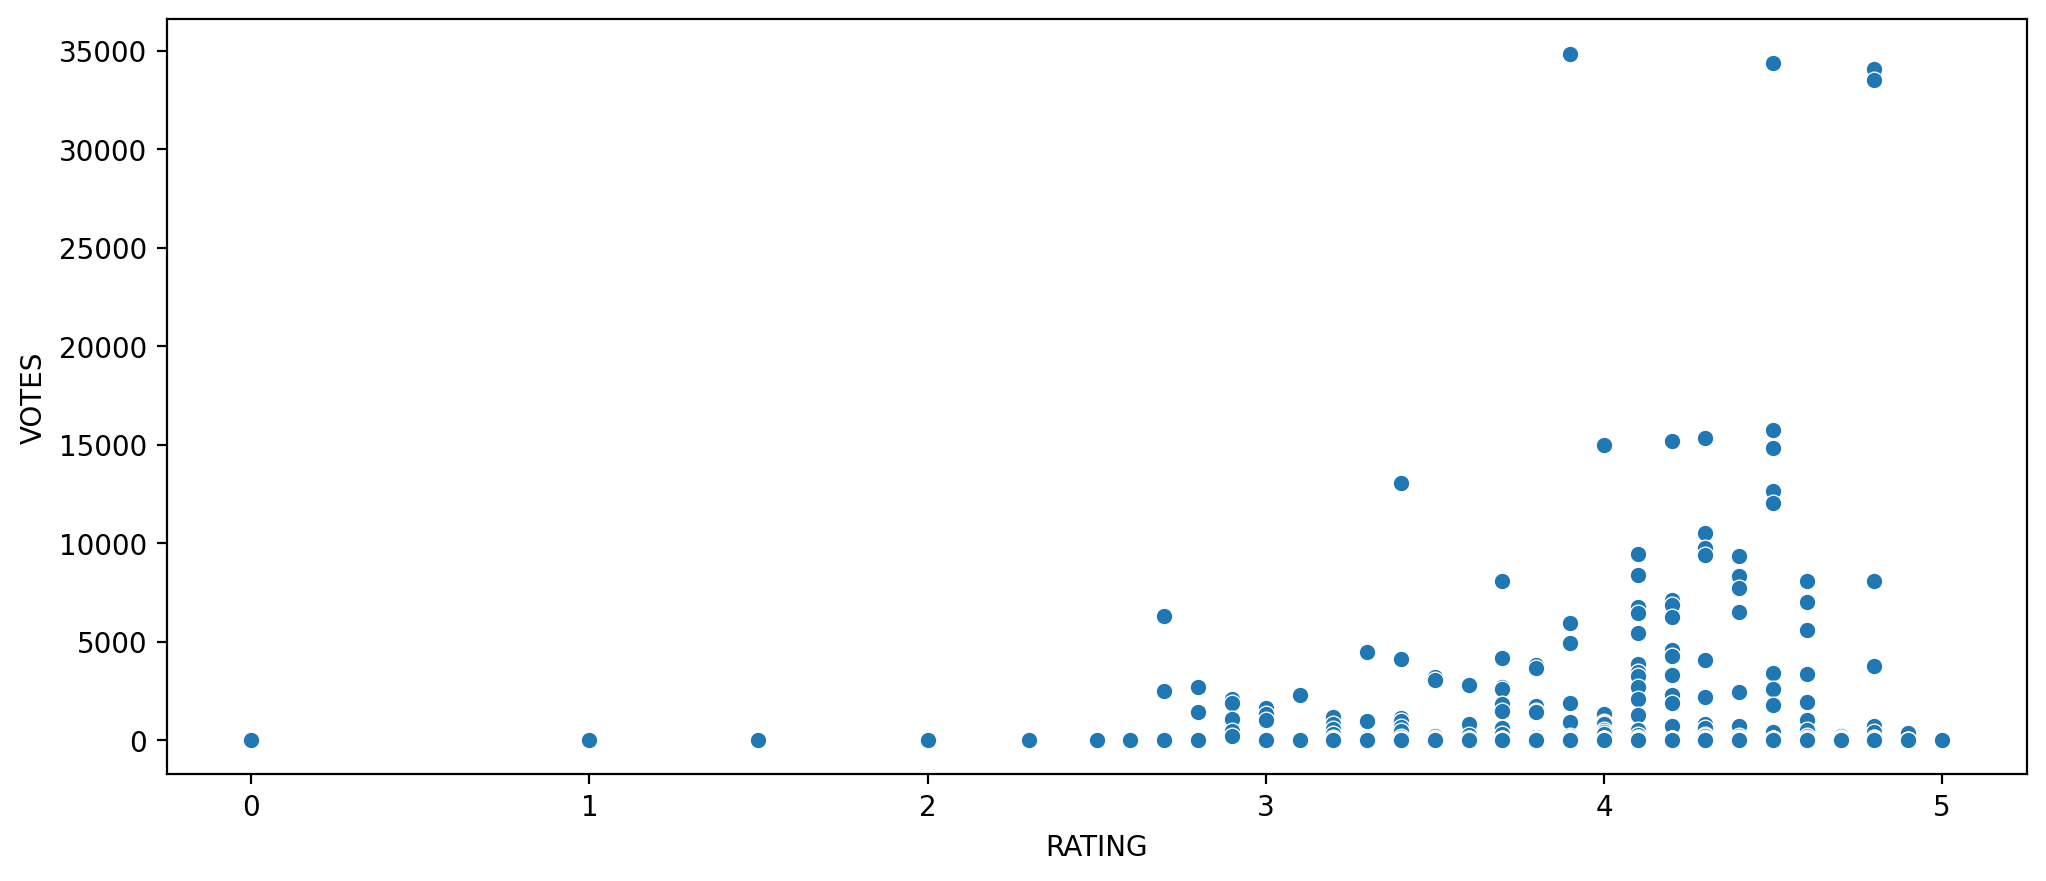

In [324]:
# Scatterlot showing relationship between rating and votes
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

**Calculate the correlation between the columns:**

In [325]:
# Calculate the correlation between the columns
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Create a new column that is able to strip the year from the title strings**

In [326]:
# Extract film year to a new column
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].split(')')[0])

In [327]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Numbers of movies in the Fandango DataFrame per year**

In [328]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
2012      1
1964      1
Name: YEAR, dtype: int64

**Visualize the count of movies per year with a plot:**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

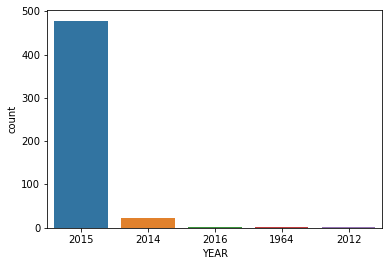

In [329]:
sns.countplot(data=fandango,x='YEAR')

**Top 10 movies with the highest votes**

In [330]:
fandango.sort_values(by='VOTES',ascending=False).head(10)
# fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Numbers of movies with zero votes**

In [331]:
len(fandango[fandango['VOTES'] == 0])

69

**DataFrame of only reviewed films.**

In [332]:
votedFilms = fandango[fandango['VOTES'] > 0]

In [333]:
votedFilms

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).**

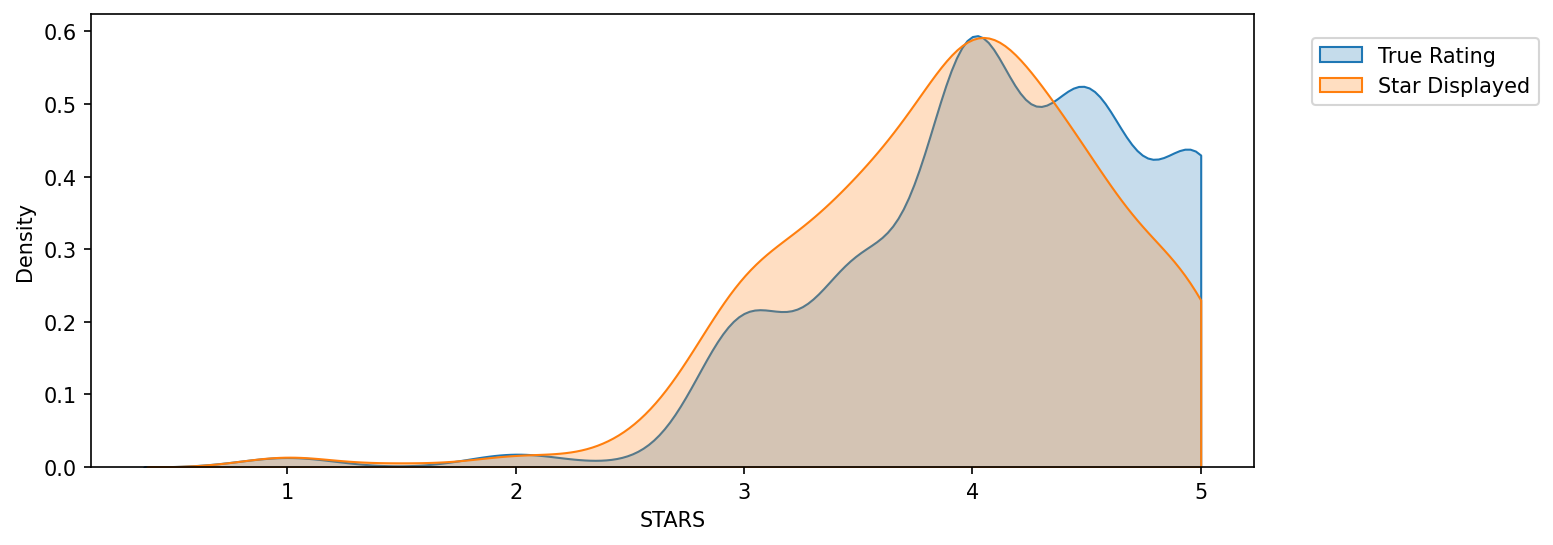

In [334]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=votedFilms,x='STARS',shade='fill',clip=(0,5))
sns.kdeplot(data=votedFilms,x='RATING',shade='fill',clip=(0,5))
plt.legend(['True Rating','Star Displayed'],loc=(1.05,0.8))

**Create a new column to show the disparity between STARS AND RATING**

In [335]:
votedFilms['STARS-DIFF'] = round((votedFilms['STARS'] - votedFilms['RATING']),1)

<ipython-input-335-a441541ebe3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votedFilms['STARS-DIFF'] = round((votedFilms['STARS'] - votedFilms['RATING']),1)


In [336]:
votedFilms

,FILM,STARS,RATING,VOTES,YEAR,STARS-DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Create a countplot to display the number of times difference occurs**

/Users/oluwaseunolukayode/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STARS-DIFF', ylabel='count'>

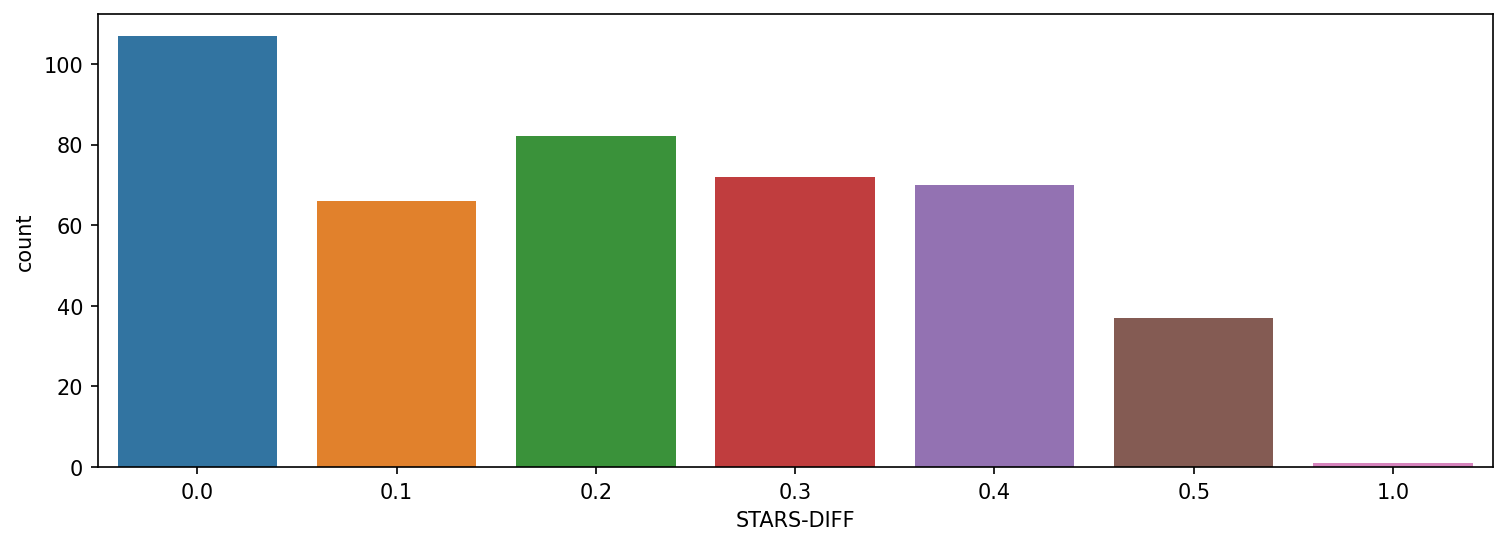

In [337]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(votedFilms['STARS-DIFF'])

**Find movie with over 1 star above its actual rating**

In [338]:
votedFilms[votedFilms['STARS-DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS-DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites

In [339]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Explore the DataFrame columns, info, description.**

In [340]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [341]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [342]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

(0.0, 100.0)

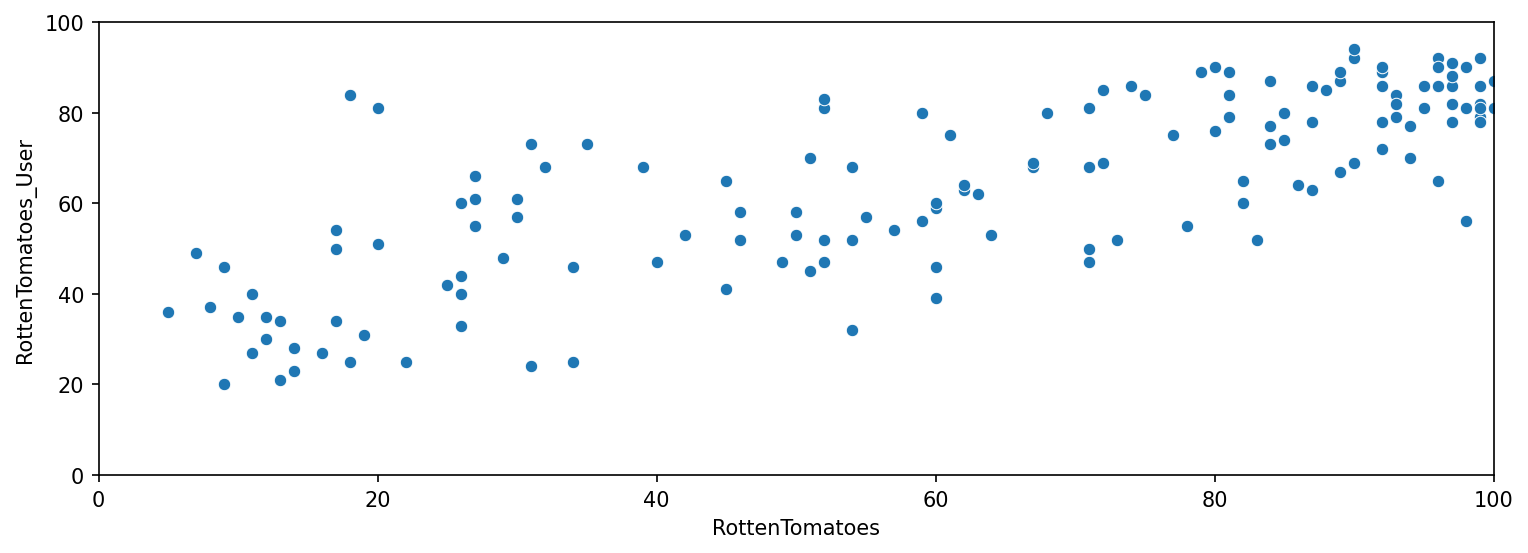

In [343]:
plt.figure(figsize=(12,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. 

In [344]:
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [345]:
all_sites['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**Calculate the Mean Absolute Difference between RT scores and RT User scores**

In [346]:
all_sites['Rotten_Diff'].abs().mean()

15.095890410958905

**Distribution of the differences between RT Critics Score and RT User Score**

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

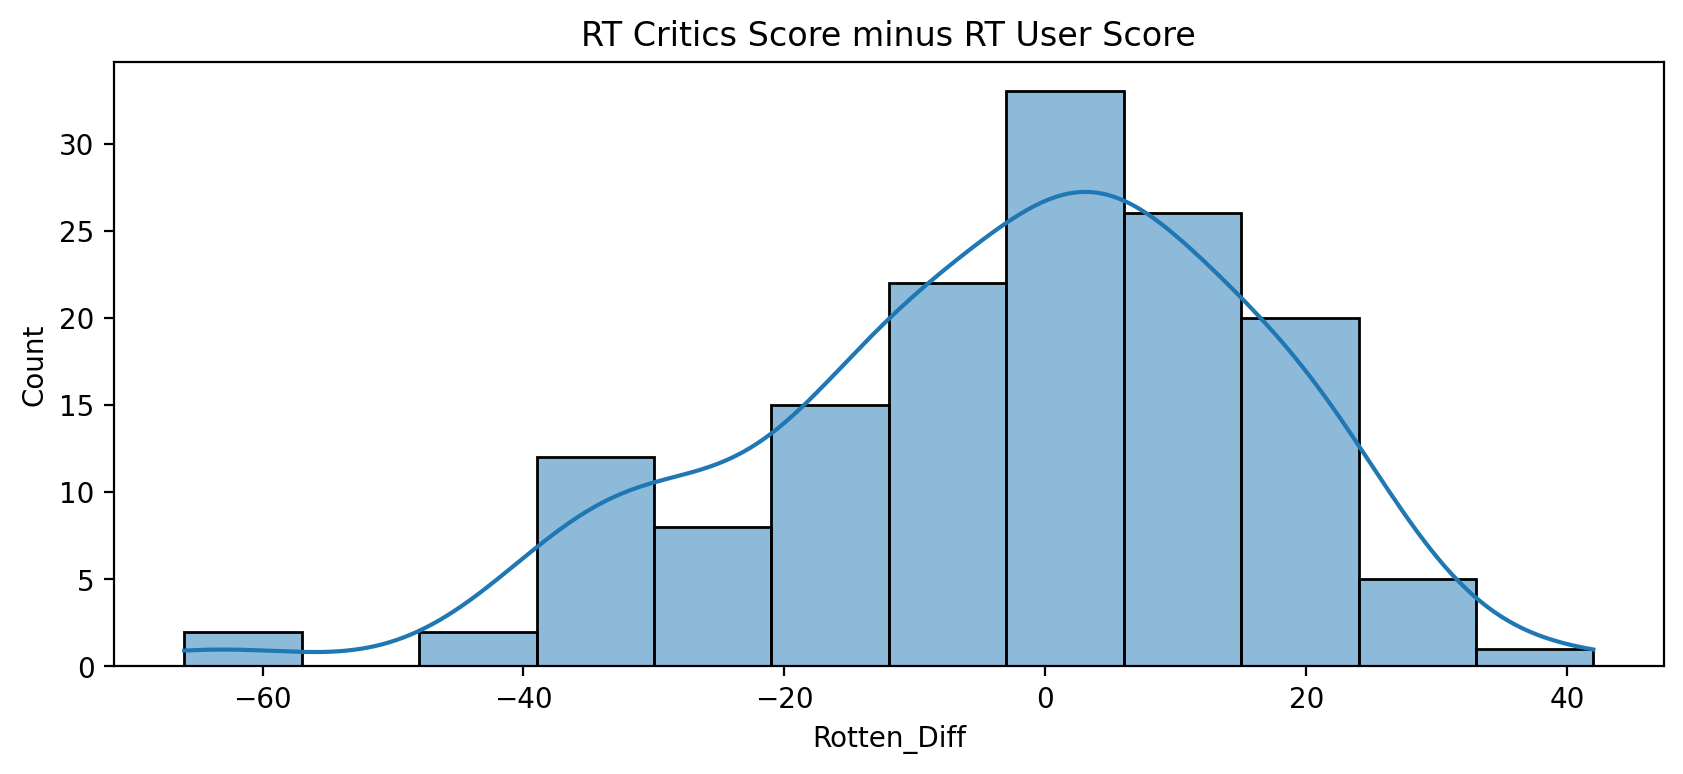

In [347]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True)
plt.title('RT Critics Score minus RT User Score')

**Distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

Text(0.5, 1.0, 'Absolute difference btw RT Critics Score and RT User Score')

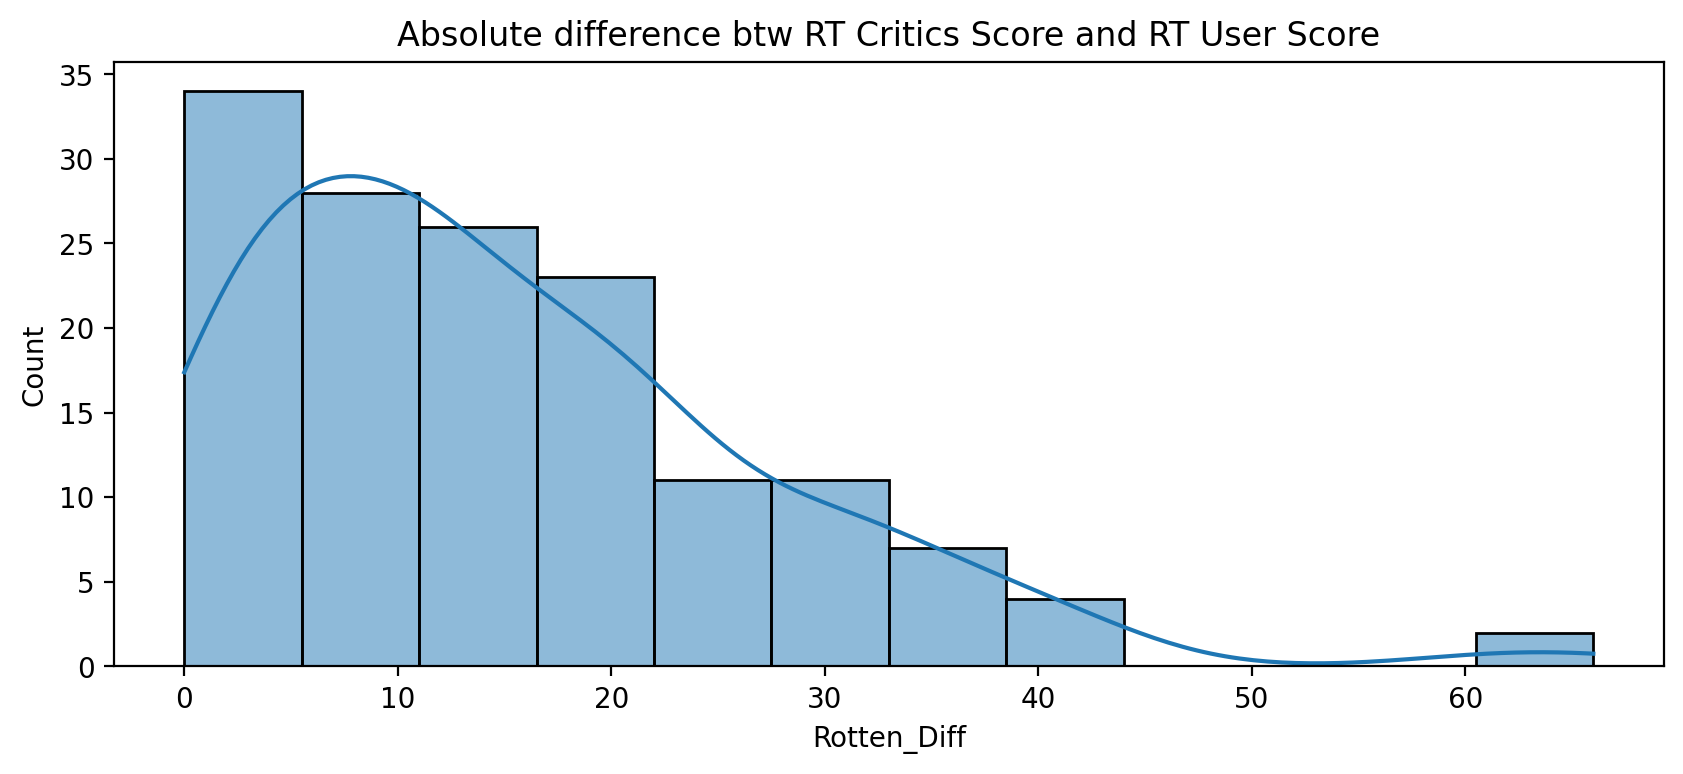

In [348]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(all_sites['Rotten_Diff'].abs(),kde=True)
plt.title('Absolute difference btw RT Critics Score and RT User Score')

**Let's find out which movies are causing the largest differences. First, let's show the top 5 movies with the largest *negative* difference between Users and RT critics.**

**Top 5 movies users rated higher than critics on average:**

In [349]:
# all_sites[['FILM','Rotten_Diff']].sort_values(by='Rotten_Diff').head(5)
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Top 5 movies critics scores higher than users on average.**

In [350]:
# all_sites[['FILM','Rotten_Diff']].sort_values(by='Rotten_Diff',ascending=False).head(5)
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**Scatterplot of the Metacritic Rating versus the Metacritic User rating.**

(0.0, 10.0)

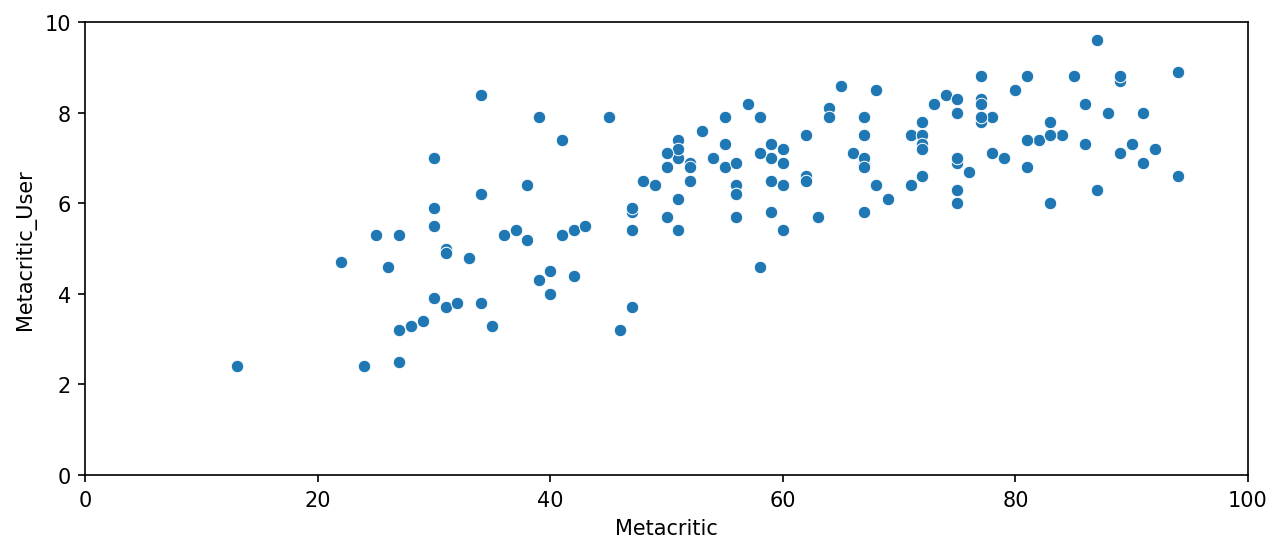

In [351]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

### IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

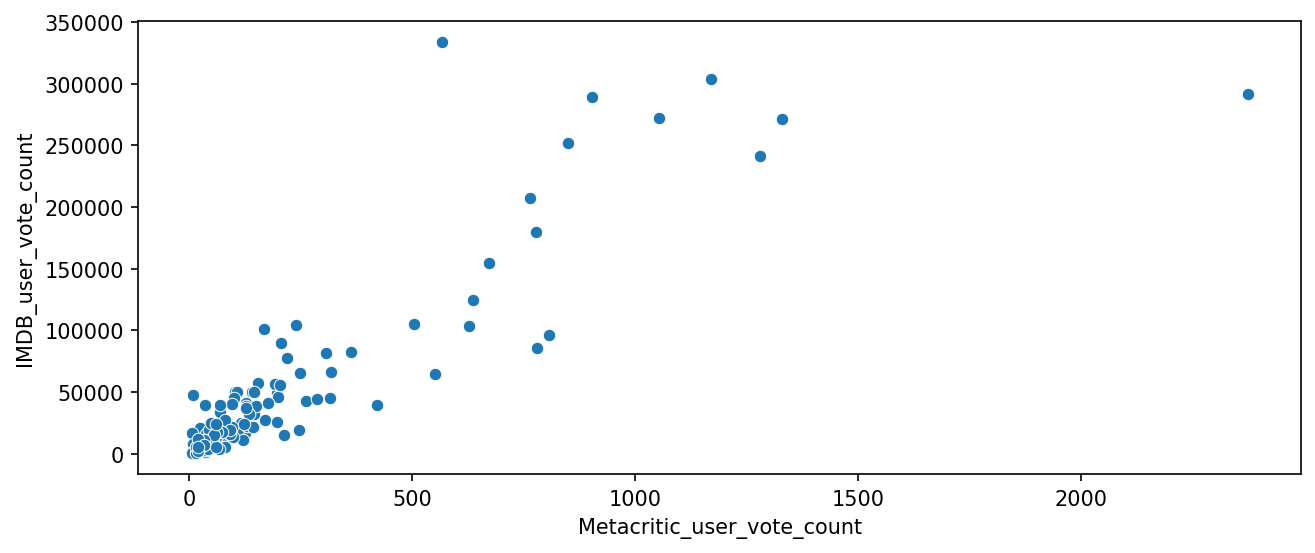

In [352]:
# Scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**There are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**Movie with the highest IMDB user vote count?**

In [353]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Movie with the highest Metacritic User Vote count?**

In [354]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Combine the Fandango Table with the All Sites table. **

In [355]:
# Combine Fandago dataset with others
combined_df = fandango.merge(all_sites,how='inner',on='FILM')

In [356]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [357]:
combined_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

RT,Metacritic, and IMDB doesn't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

In [358]:
# Normalize RT ratings to Fandango 0-5 rating
combined_df['RT_Norm'] = combined_df['RottenTomatoes'].apply(lambda rating:round((rating*5)/100,1))
combined_df['RTU_Norm'] = combined_df['RottenTomatoes_User'].apply(lambda rating:round((rating*5)/100,1))

In [359]:
# Normalize Metacritic ratings and IMDB to Fandango 0-5 rating
combined_df['Meta_Norm'] = combined_df['Metacritic'].apply(lambda rating:round((rating*5)/100,1))
combined_df['Meta_U_Norm'] = combined_df['Metacritic_User'].apply(lambda rating:round((rating*5)/10,1))

In [360]:
# Normalize IMDB ratings to Fandango 0-5 rating
combined_df['Meta_U_Norm'] = combined_df['Metacritic_User'].apply(lambda rating:round((rating*5)/10,1))
combined_df['IMDB_Norm'] = combined_df['IMDB'].apply(lambda rating:round((rating*5)/10,1))

In [361]:
combined_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.5,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.5,4.3


**Create a norm_scores DataFrame that only contains the normalizes ratings.**

In [362]:
norm_ratings = combined_df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
#STARS and RATING from the original Fandango table included.

In [363]:
norm_ratings.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.5,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.5,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**Plot comparing the distributions of normalized ratings across all sites.**

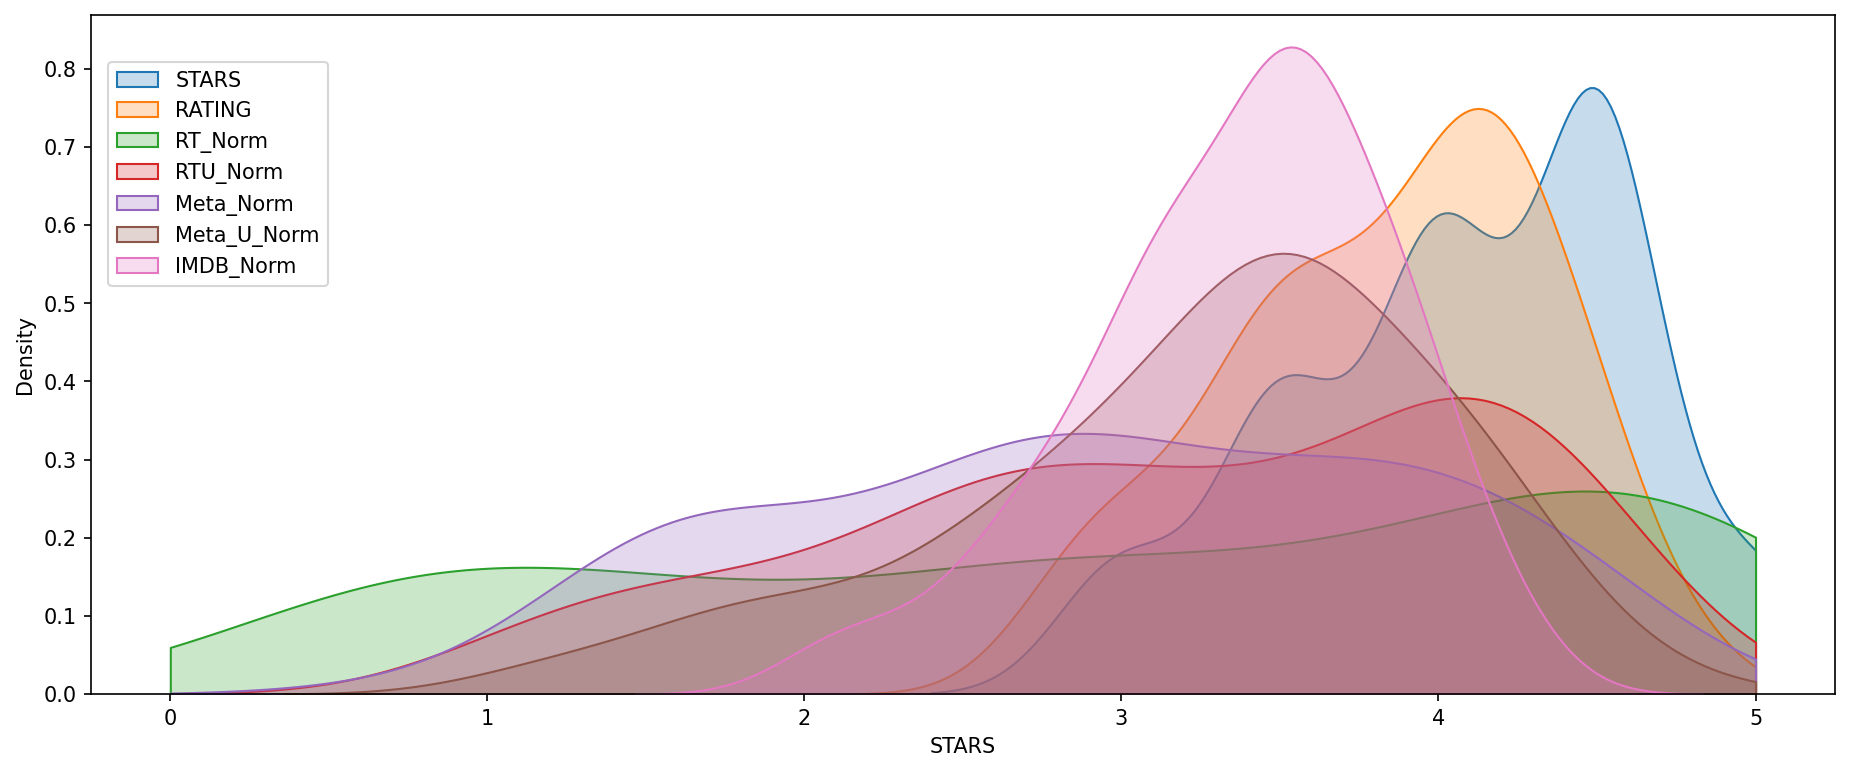

In [364]:
ratings = ['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']

plt.figure(figsize=(15,6),dpi=150)

for rating in ratings:
    sns.kdeplot(data=norm_ratings,x=rating,fill=True,label=rating,clip=(0,5))

plt.legend(loc=(0.01,0.6))  

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**KDE plot comparing the distribution of RT critic ratings against the STARS displayed by Fandango.**

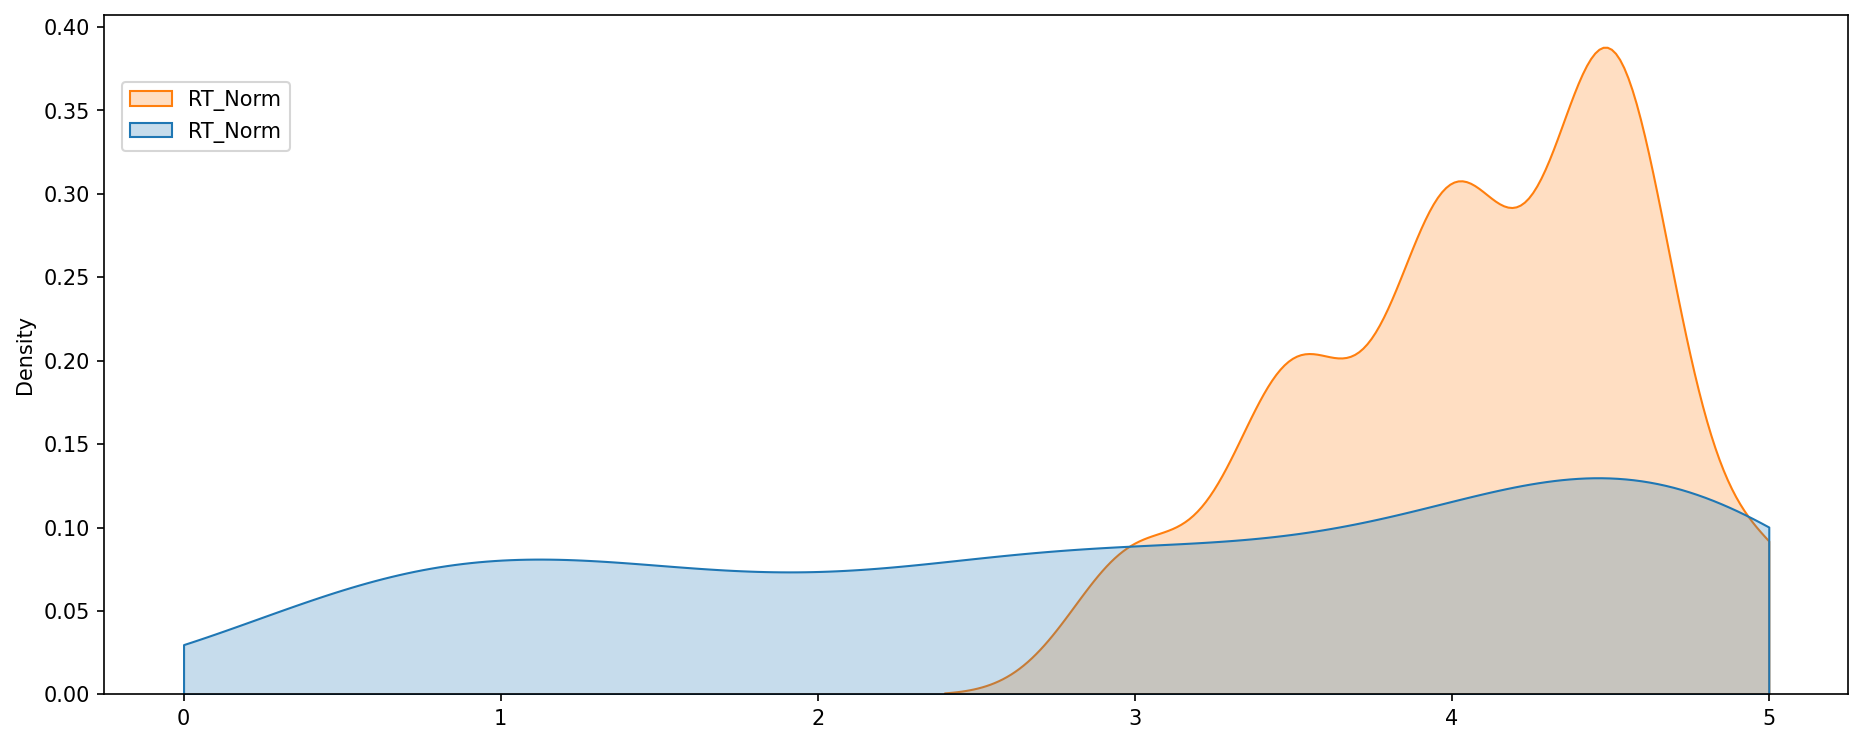

In [365]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_ratings[['RT_Norm','STARS']],fill=True,label='RT_Norm',clip=(0,5))
plt.legend(loc=(0.01,0.8))  

**Histplot comparing all normalized scores.**

<AxesSubplot:ylabel='Count'>

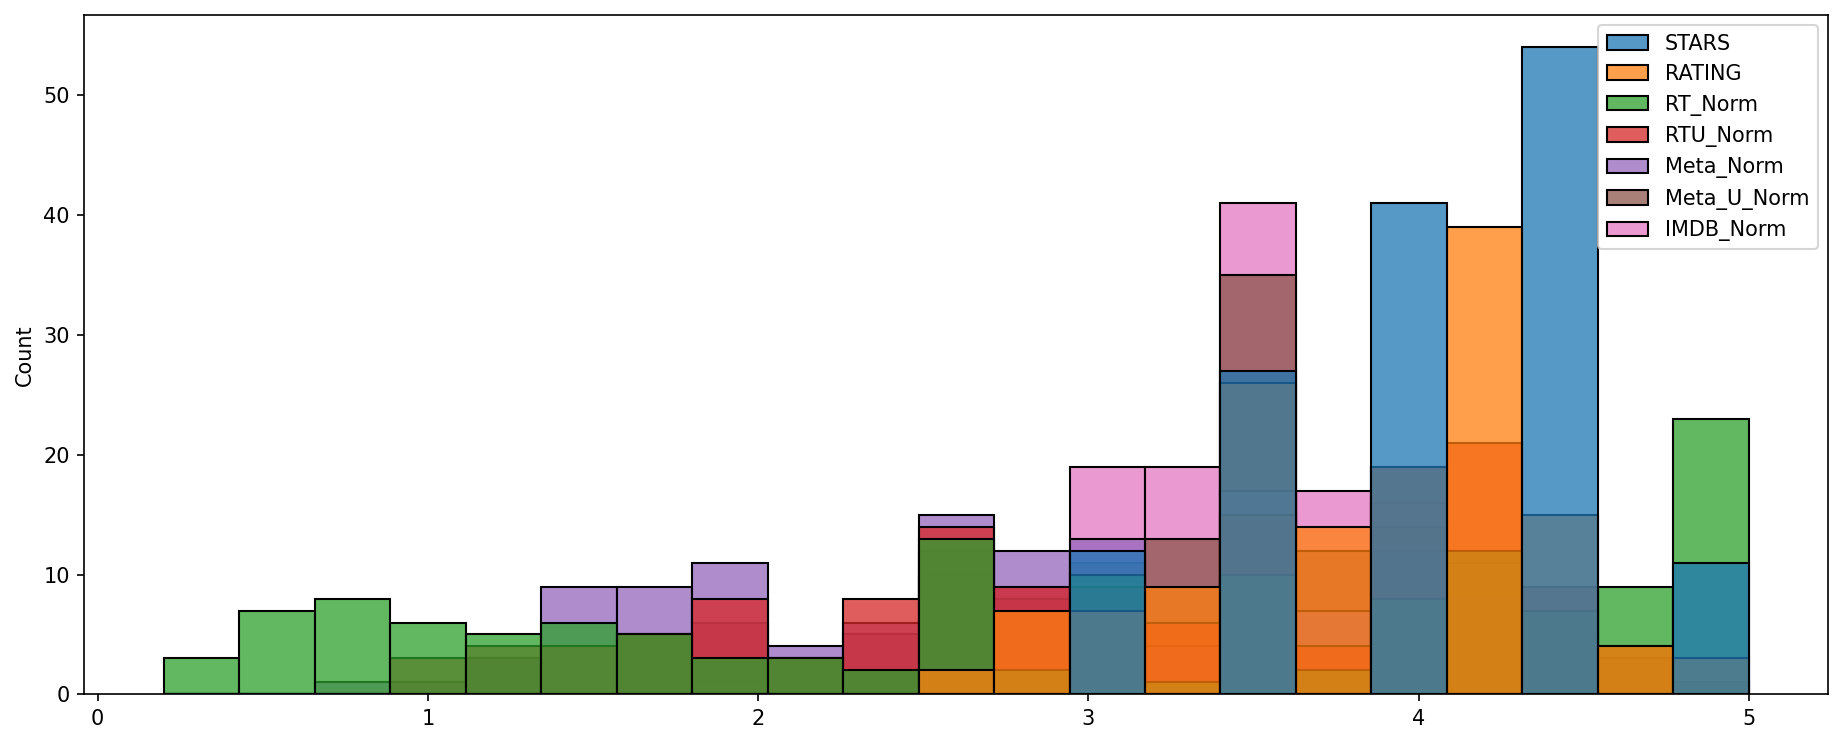

In [366]:
plt.figure(figsize=(15,6),dpi=150)
sns.histplot(data=norm_ratings)


### How are the worst movies rated across all platforms?

**Clustermap visualization of all normalized scores.**

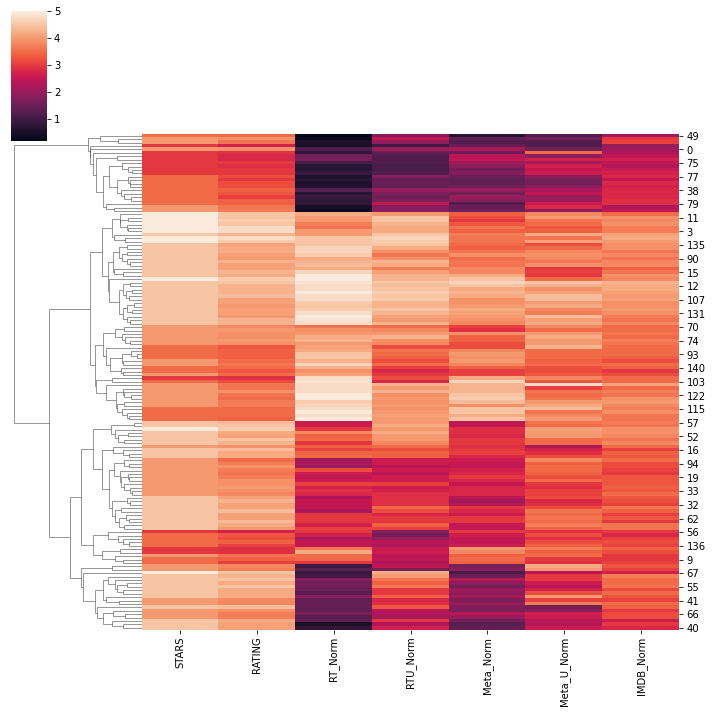

In [367]:
sns.clustermap(norm_ratings,col_cluster=False)

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating.**

**Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?**

In [368]:
# CODE HERE
norm_ratings['FILM'] = combined_df['FILM']

<ipython-input-368-19ef6c624452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_ratings['FILM'] = combined_df['FILM']


In [369]:
RT_Worst = norm_ratings.nsmallest(10,'RT_Norm')
RT_Worst

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.7,1.2,2.1,Paul Blart: Mall Cop 2 (2015)
84,4.0,3.9,0.3,2.5,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.9,1.6,1.9,2.5,Hot Pursuit (2015)
25,4.5,4.1,0.5,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.5,1.0,1.4,1.2,2.0,Fantastic Four (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,1.9,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.1,The Loft (2015)


**FINAL: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

Text(0.5, 1.0, "Ratings for RT Critic's 10 Worst Reviewed Films")

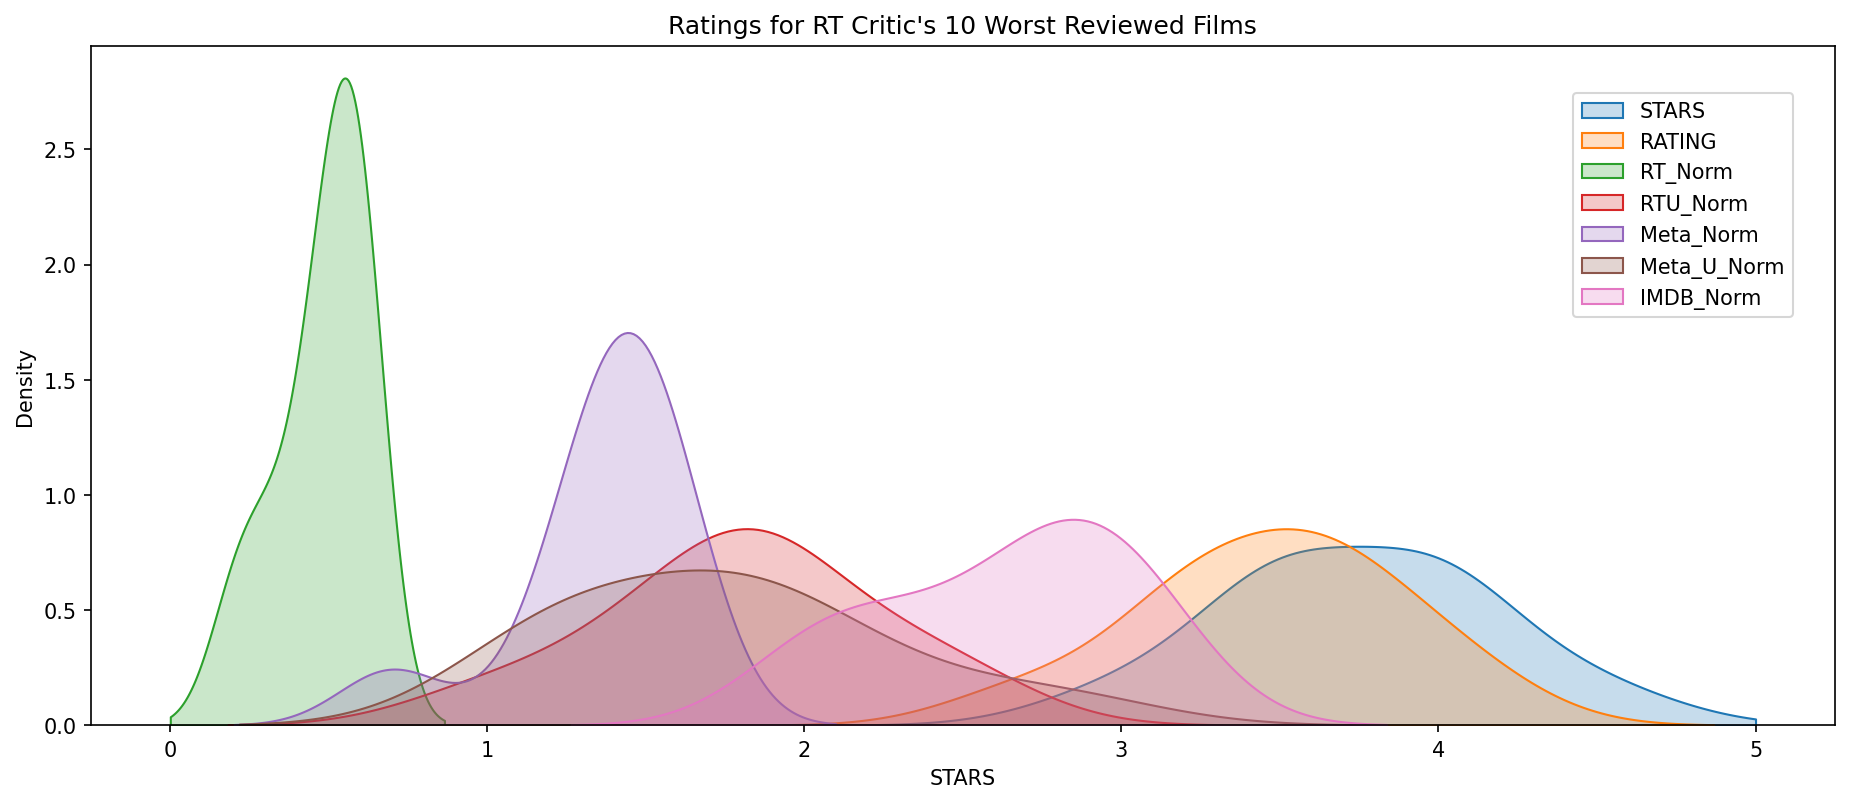

In [370]:
# CODE HERE
ratings = ['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']

plt.figure(figsize=(15,6),dpi=150)

for rating in ratings:
    sns.kdeplot(data=RT_Worst,x=rating,fill=True,label=rating,clip=(0,5))

plt.legend(loc=(0.85,0.6)) 
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")

----